 ##                                                A.8                PYTHON CODE

In [1]:
from sklearn import neighbors
from sklearn import metrics
import random
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import preprocessing
import glob
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [2]:
##Reading from the file 
imglist=[]
imgnamelist=[]
imgdict={}
newdict={}
label=[]
for nam in glob.glob(".\CroppedYale\yaleB*[0-3][0-9]\*_P00A*.pgm"):
    subjectid=int(nam[19:21])
    label.append(nam[19:21])
    newdict[nam[19:21]]=newdict.get(nam[19:21],0)+1
#     newdict[nam[14:21]]=newdict.get(nam[14:21],0)+1
    imgnamelist.append(nam)
    img= mpimg.imread(nam)
    img=img[::2,::2]
#     imglist.append(img.reshape(1,img.shape[0]*img.shape[1]))
#     imgdict.get(subjectid,img.reshape(1,img.shape[0]*img.shape[1]))
    listTemp=imgdict.get(subjectid,[])
    if len(listTemp)<59:
        listTemp.append(img.reshape(1,img.shape[0]*img.shape[1]))
        imglist.append(img.reshape(1,img.shape[0]*img.shape[1]))

    imgdict[subjectid]=listTemp
    
X=np.array(imglist).reshape(59*38,img.shape[0]*img.shape[1])
Y=[]
ones_list=np.ones(59)
for k in imgdict.keys():
    Y.append(ones_list*k)


In [3]:
##Shuffling the images and creating  feature matrix for kNN purpose:
shuffled_index=[]
for kk in range(38):
    bucket_59=list(range(kk*59,(kk*59)+59))
    random.shuffle(bucket_59)
    shuffled_index.append(bucket_59)
final_indices=np.array(shuffled_index).reshape(2242,)
X_final=X[final_indices,:]

### PCA Part

In [4]:
##Centering the data
newimg=np.array(imglist).reshape(2242,img.shape[0]*img.shape[1])
meanimg=np.mean(newimg,axis=0)
newimgtilda=newimg-meanimg

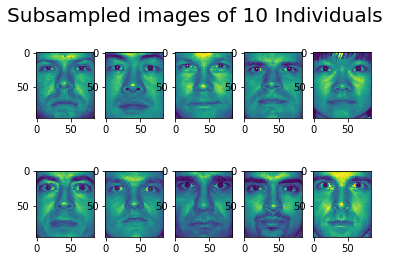

In [6]:
##Plotting subsampled image of 10 individuals
fig,ax=plt.subplots(2,5)
j=0
k=0
for i in range(10):
    ax[k,j].imshow(newimg[i*59,:].reshape(96,84))
    if j!=4:
        j=j+1
    else:
        j=0
        k=1
plt.suptitle("Subsampled images of 10 Individuals ",fontsize=20);


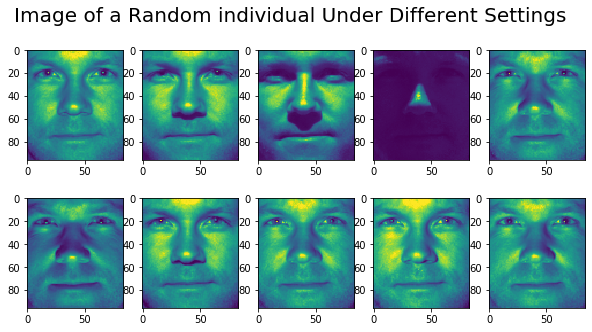

In [75]:
##Plottng 10 different images of an individual 
plt.rcParams['figure.figsize']=[10,5]
fig,ax=plt.subplots(2,5)
# random.shuffle(subject_copy)
j=0
k=0
for i in range(10):
    ax[k,j].imshow(newimg[2*59+i,:].reshape(96,84))
    if j!=4:
        j=j+1
    else:
        j=0
        k=1
plt.suptitle("Image of a Random individual Under Different Settings  ",fontsize=20);


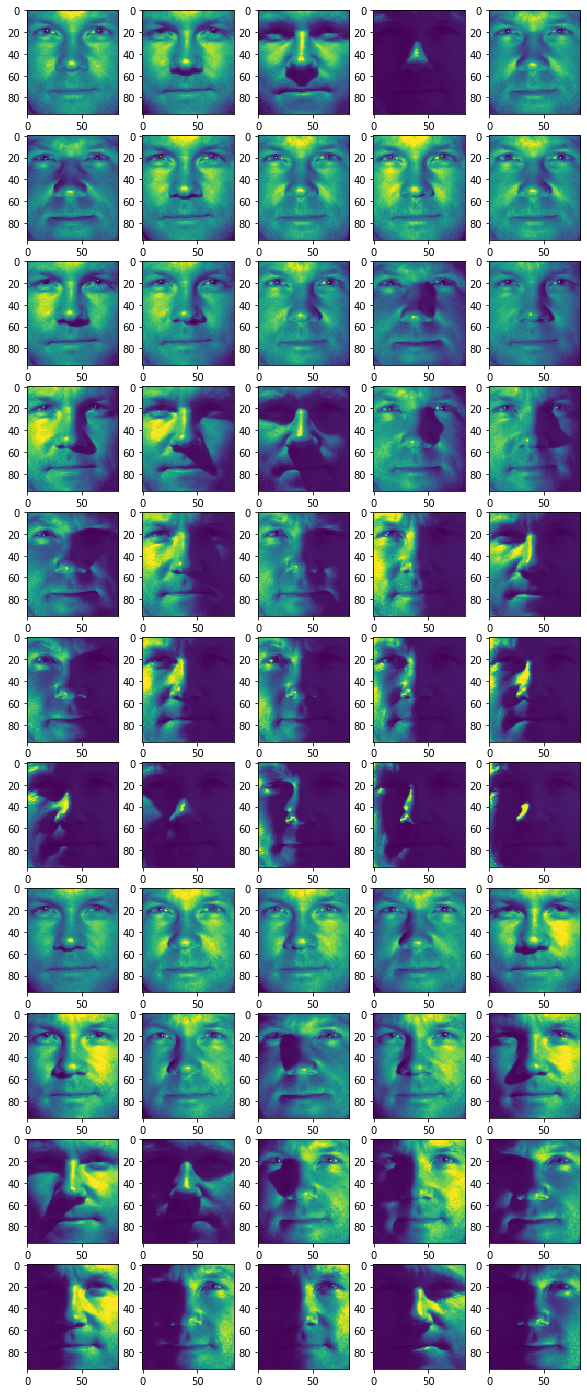

In [83]:
##Plottng 55 different images of an individual 

plt.rcParams['figure.figsize']=[10,25]
fig,ax=plt.subplots(11,5)
# plt.suptitle("Image of a Random individual Under Different Settings  ",fontsize=20);

# random.shuffle(subject_copy)
j=0
k=0
for i in range(55):
    ax[k,j].imshow(newimg[2*59+i,:].reshape(96,84))
    if j!=4:
        j=j+1
    else:
        j=0
        k=k+1
plt.savefig('img_3.pdf');


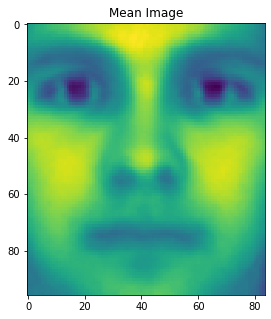

In [7]:
##Plotting mean image
plt.rcParams['figure.figsize']=[10,5]
plt.imshow(meanimg.reshape(img.shape[0],img.shape[1]))
plt.title("Mean Image");

In [8]:
##Doing SVD on the centered data
U, s, VT = np.linalg.svd(newimgtilda)
totalvariance=np.dot(s,s.T)

# target=expvariance/totalvariance
k=0
target=0
while target<=0.9:
    target=(np.dot(s[:k],s[:k].T))/totalvariance
    k=k+1
k=k-1
print("We need k={0}  to preserve 90% of the variance".format(k))


We need k=23  to preserve 90% of the variance


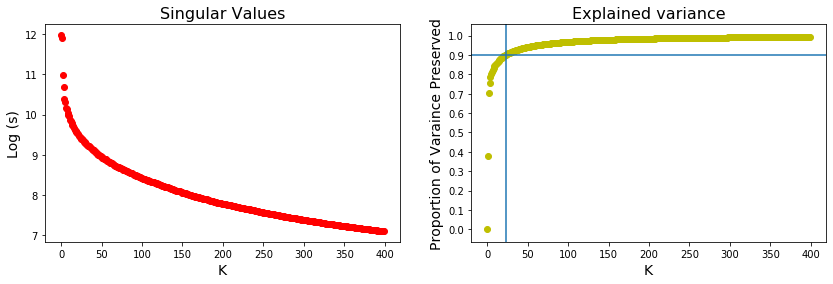

In [9]:
##Plotting singular values and Explained variance
i=0
prop=[]
plt.rcParams['figure.figsize'] = [14,4]                  

for i in range(len(s)):
    prop.append(np.dot(s[:i],s[:i].T)/totalvariance)
plt.subplot(121)
plt.scatter(range(400),[np.log(yy) for yy in s[:400]],c='r')
plt.ylabel("Log (s)",fontsize=14)
plt.xlabel("K",fontsize=14)
plt.title("Singular Values",fontsize=16)
plt.subplot(122)
plt.scatter(range(400),[xx for xx  in prop[:400]],c='y')
plt.yticks(ticks=(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1))
plt.title("Explained variance",fontsize=16)
plt.xlabel("K",fontsize=14)
plt.ylabel("Proportion of Varaince Preserved",fontsize=14)
plt.axhline(y=0.9)
plt.axvline(x=23);

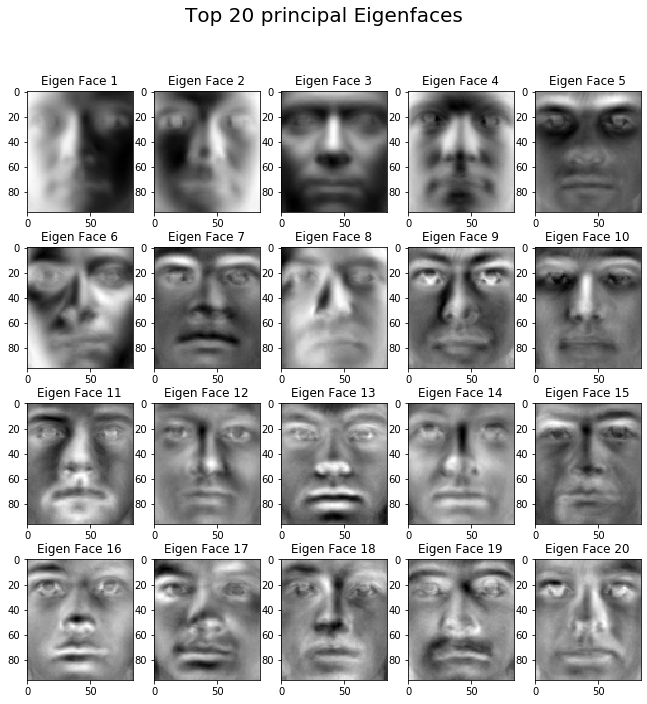

In [10]:
##Plotting top 0 principal directions
plt.rcParams['figure.figsize'] = [11, 11] # sets the size of figures in this notebook
i=0
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(VT[i,:].reshape(96,84),cmap = plt.cm.gray)
    plt.title("Eigen Face %d"%(i+1))

plt.suptitle("Top 20 principal Eigenfaces",fontsize=20);



In [49]:
rr=random.sample(range(0,2242),5)
rr

[2147, 1402, 1007, 1470, 944]

## Plotting projected images that are randomly selected

### Image 1:

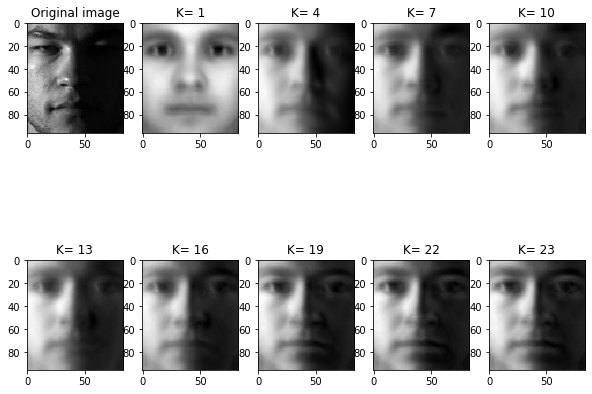

In [50]:
plt.rcParams['figure.figsize'] = [10,8] # sets the size of figures in this notebook
k=0
x0=newimg[rr[0]]
x0_m=x0-meanimg
x0_m.reshape(96,84)

fig,ax=plt.subplots(2,5)
ax[0,0].imshow(x0.reshape(96,84), cmap='gray')
ax[0,0].set_title("Original image")

"""By slide 21 of lecture notes PCA  Projections of the data onto this plane are given by the rows of
PS(X) = 1 X(bar)transpose + XTilda*V*V(Transpose)"""
g=0
h=1
for k in range(0,24,3):
#     aa=np.matmul(x0_m,v3[:,:k])
#     YY=meandigit3.reshape(1,784)+np.matmul(aa,v3[:,:k].T) 
    YY=meanimg+np.dot(x0_m,(np.matmul(VT[:k,:].T,VT[:k,:])))
#     plt.subplot(10,5,k+1)
#     plt.subplots_adjust(hspace=0.5)
    ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
    ax[g,h].set_title("K= %d"%(k+1))
    if h!=4:
#         ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
        h=h+1
    else:
        g=g+1
        h=0
YY=meanimg+np.dot(x0_m,(np.matmul(VT[:23,:].T,VT[:23,:])))
ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
ax[g,h].set_title("K= 23");
        

### Image 2:

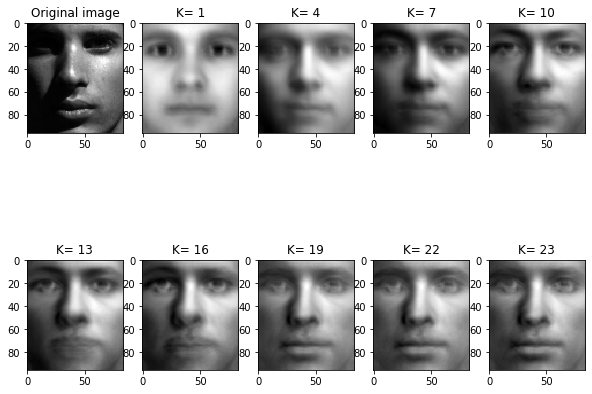

In [51]:
plt.rcParams['figure.figsize'] = [10,8] # sets the size of figures in this notebook
k=0
x0=newimg[rr[1]]
x0_m=x0-meanimg
x0_m.reshape(96,84)

fig,ax=plt.subplots(2,5)
ax[0,0].imshow(x0.reshape(96,84), cmap='gray')
ax[0,0].set_title("Original image")

"""By slide 21 of lecture notes PCA  Projections of the data onto this plane are given by the rows of
PS(X) = 1 X(bar)transpose + XTilda*V*V(Transpose)"""
g=0
h=1
for k in range(0,23,3):
#     aa=np.matmul(x0_m,v3[:,:k])
#     YY=meandigit3.reshape(1,784)+np.matmul(aa,v3[:,:k].T) 
    YY=meanimg+np.dot(x0_m,(np.matmul(VT[:k,:].T,VT[:k,:])))
#     plt.subplot(10,5,k+1)
#     plt.subplots_adjust(hspace=0.5)
    ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
    ax[g,h].set_title("K= %d"%(k+1))
    if h!=4:
#         ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
        h=h+1
    else:
        g=g+1
        h=0
YY=meanimg+np.dot(x0_m,(np.matmul(VT[:23,:].T,VT[:23,:])))
ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
ax[g,h].set_title("K= 23");
        

### Image 3

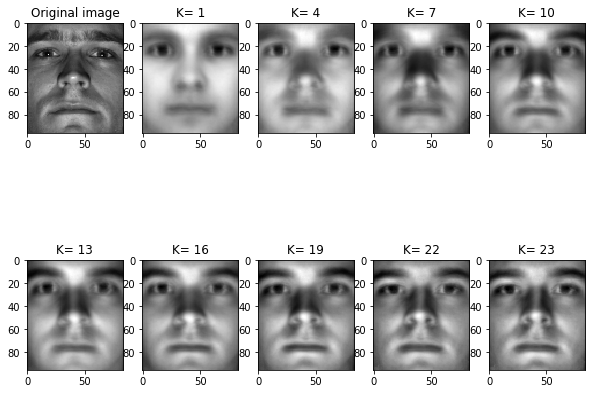

In [52]:
plt.rcParams['figure.figsize'] = [10,8] # sets the size of figures in this notebook
k=0
x0=newimg[rr[2]]
x0_m=x0-meanimg
x0_m.reshape(96,84)

fig,ax=plt.subplots(2,5)
ax[0,0].imshow(x0.reshape(96,84), cmap='gray')
ax[0,0].set_title("Original image")

"""By slide 21 of lecture notes PCA  Projections of the data onto this plane are given by the rows of
PS(X) = 1 X(bar)transpose + XTilda*V*V(Transpose)"""
g=0
h=1
for k in range(0,24,3):
#     aa=np.matmul(x0_m,v3[:,:k])
#     YY=meandigit3.reshape(1,784)+np.matmul(aa,v3[:,:k].T) 
    YY=meanimg+np.dot(x0_m,(np.matmul(VT[:k,:].T,VT[:k,:])))
#     plt.subplot(10,5,k+1)
#     plt.subplots_adjust(hspace=0.5)
    ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
    ax[g,h].set_title("K= %d"%(k+1))
    if h!=4:
#         ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
        h=h+1
    else:
        g=g+1
        h=0
YY=meanimg+np.dot(x0_m,(np.matmul(VT[:23,:].T,VT[:23,:])))
ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
ax[g,h].set_title("K= 23");

## Image 4

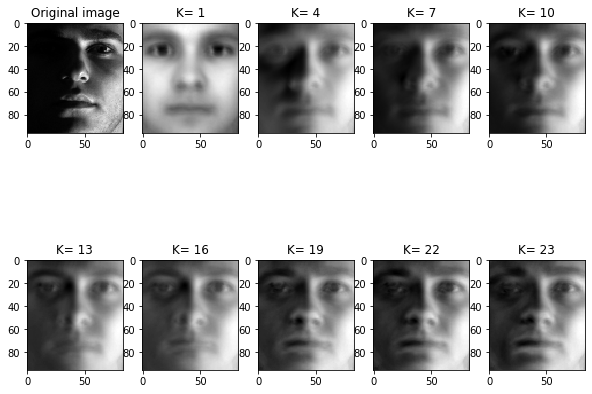

In [53]:
plt.rcParams['figure.figsize'] = [10,8] # sets the size of figures in this notebook
k=0
x0=newimg[rr[3]]
x0_m=x0-meanimg
x0_m.reshape(96,84)

fig,ax=plt.subplots(2,5)
ax[0,0].imshow(x0.reshape(96,84), cmap='gray')
ax[0,0].set_title("Original image")

"""By slide 21 of lecture notes PCA  Projections of the data onto this plane are given by the rows of
PS(X) = 1 X(bar)transpose + XTilda*V*V(Transpose)"""
g=0
h=1
for k in range(0,23,3):
#     aa=np.matmul(x0_m,v3[:,:k])
#     YY=meandigit3.reshape(1,784)+np.matmul(aa,v3[:,:k].T) 
    YY=meanimg+np.dot(x0_m,(np.matmul(VT[:k,:].T,VT[:k,:])))
#     plt.subplot(10,5,k+1)
#     plt.subplots_adjust(hspace=0.5)
    ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
    ax[g,h].set_title("K= %d"%(k+1))
    if h!=4:
#         ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
        h=h+1
    else:
        g=g+1
        h=0
YY=meanimg+np.dot(x0_m,(np.matmul(VT[:23,:].T,VT[:23,:])))
ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
ax[g,h].set_title("K= 23");
        

## Image 5

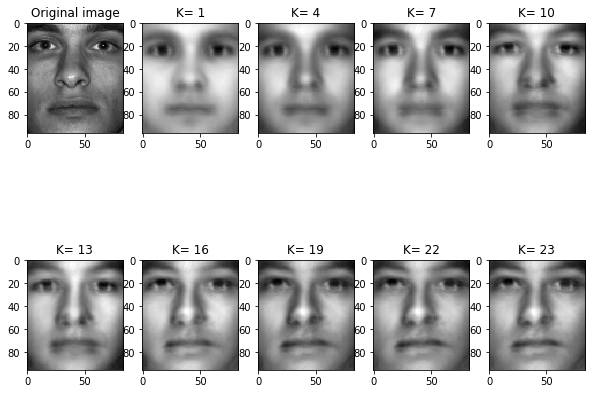

In [54]:
plt.rcParams['figure.figsize'] = [10,8] # sets the size of figures in this notebook
k=0
x0=newimg[rr[4]]
x0_m=x0-meanimg
x0_m.reshape(96,84)

fig,ax=plt.subplots(2,5)
ax[0,0].imshow(x0.reshape(96,84), cmap='gray')
ax[0,0].set_title("Original image")

"""By slide 21 of lecture notes PCA  Projections of the data onto this plane are given by the rows of
PS(X) = 1 X(bar)transpose + XTilda*V*V(Transpose)"""
g=0
h=1
for k in range(0,23,3):
#     aa=np.matmul(x0_m,v3[:,:k])
#     YY=meandigit3.reshape(1,784)+np.matmul(aa,v3[:,:k].T) 
    YY=meanimg+np.dot(x0_m,(np.matmul(VT[:k,:].T,VT[:k,:])))
#     plt.subplot(10,5,k+1)
#     plt.subplots_adjust(hspace=0.5)
    ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
    ax[g,h].set_title("K= %d"%(k+1))
    if h!=4:
#         ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
        h=h+1
    else:
        g=g+1
        h=0
YY=meanimg+np.dot(x0_m,(np.matmul(VT[:23,:].T,VT[:23,:])))
ax[g,h].imshow(YY.reshape(96,84),cmap = plt.cm.gray)
ax[g,h].set_title("K= 23");
        

### KNN Part

In [14]:
def splitdatset(data,topPrincipalDirections,selectedValues):
    ''' Split the data into test and train based on the selected values returns '''
    
    trainX=[]
    testX=[]
    trainY=[]
    testY=[]
    testXOriginalIndex=[]
    testYOriginalIndex=[]

    subject=[kk for kk in imgdict.keys()]
#     trainpercent=int(59*.8)

    for i in range(38):
        rdict={}
        for r in selectedValues.get(i):
            trainX.append(data[i*59+r])
            trainY.append(subject[i])
            rdict[r]=r
        for k in range(59):
                if k not in rdict:
                    testX.append(data[i*59+k])
                    testY.append(subject[i])
                    testXOriginalIndex.append(i*59+k)
                    testYOriginalIndex.append(subject[i])
    trainX_pca=np.array(trainX).reshape(len(trainX),topPrincipalDirections)
    # trainY_pca=np.array(trainY).reshape(len(trainY),1)
    trainY_pca=np.array(trainY)
    testX_pca=np.array(testX).reshape(len(testX),topPrincipalDirections)
    testY_pca=np.array(testY)
    return (trainX_pca,trainY_pca,testX_pca,testY_pca)
    
def getTrainDataRandomRange(percent):
    '''Select random data set indices based on the percentage ratio'''
    trainpercent=int(59*percent)
    selectedValues={}
    for i in range(38):
        rdict={}
        for j in range(trainpercent):
            r=random.randint(0,58)
            while rdict.get(r,-1)==r:
                r=random.randint(0,58)   
            rValues=selectedValues.get(i,[])
            rValues.append(r)
            selectedValues[i]=rValues
            rdict[r]=r
    return selectedValues
    
def getTrainData5foldRange(numOfold):
    '''Select random data set indices based on the percentage ratio
        numOfold starts from 1
    '''
#     numOfolds=5
    percent=0.8
    trainpercent=int(59*percent)
    skipCount=59-trainpercent
    skipRange=range(skipCount*(numOfold-1),skipCount*numOfold)
    selectedValues={}
    for i in range(38):
        for r in range(59):
            if r not in skipRange:
                rValues=selectedValues.get(i,[])
                rValues.append(r)
                selectedValues[i]=rValues
    return selectedValues
    

In [15]:


def optimalK_knn(topPrincipalDirections,selectedValues):
    ## Project image to top k eigen vectors
    pcaproj=np.dot(X_final,VT[:topPrincipalDirections,:].T)

    ## Split the data to Test and Train
    trainX_pca,trainY_pca,testX_pca,testY_pca=splitdatset(pcaproj,topPrincipalDirections,selectedValues)
   
    ##Normalizing the data
    
    from sklearn import preprocessing
    trainX_norm = preprocessing.normalize(trainX_pca)
    testX_norm = preprocessing.normalize(testX_pca)
    
    from sklearn.metrics import accuracy_score
    from sklearn.neighbors import KNeighborsClassifier
    testscore=[]
    trainscore=[]
    testerror=[]
    trainerror=[]
    
    ##Fitting and Predicting the traindata and testdata and calculating trainerror and testerror respectively 
    for k in range(2,15):
        knn = KNeighborsClassifier(n_neighbors=k)

    # fitting the model
        knn.fit(trainX_norm, trainY_pca)

    # predict the response
        pred = knn.predict(testX_norm)
        errorcount=0
        for jj in range(len(pred)):
            if testY_pca[jj]!=pred[jj]:
                errorcount=errorcount+1
        testerror.append(errorcount/len(pred))
        
        pred1=knn.predict(trainX_norm)
        errorcount=0
        for jj in range(len(pred1)):
            if trainY_pca[jj]!=pred1[jj]:
                errorcount=errorcount+1
        trainerror.append(errorcount/len(pred1))

    return(testerror,trainerror)      

In [16]:
## 5 fold Cross validation
k_pca=[40,80,120,160,200,240,280]
pcak_testerrorrate=[]
pcak_trainerrorrate=[]
for fold in range(1,6):
    selectedValues=getTrainData5foldRange(fold)
    for k in k_pca:
        testerror,trainerror=optimalK_knn(k,selectedValues)
        pcak_testerrorrate.append(testerror)
        pcak_trainerrorrate.append(trainerror)

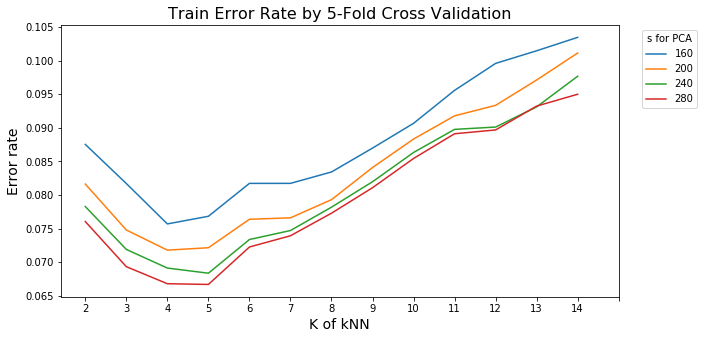

In [17]:
plt.rcParams['figure.figsize']=[10,5]
pca_trainerrorate_array=np.array(pcak_trainerrorrate).reshape(5,7,13)
meanerrorrate=np.mean(pca_trainerrorate_array,axis=0)
for j in range(3,7):
    plt.plot(meanerrorrate[j])
    plt.legend(labels=k_pca[3:],bbox_to_anchor=(0.65,0.5,0.5,0.5),title="s for PCA")
    plt.title("Train error rate")
    plt.xticks(range(0,14),range(2,15))
    plt.xlabel("K of kNN",fontsize=14)
    plt.ylabel("Error rate",fontsize=14)
    plt.title("Train Error Rate by 5-Fold Cross Validation",fontsize=16);

## From the above plot, k=4 for kNN and PCA for s=280 principal dimensions as it minimizes the train error rate

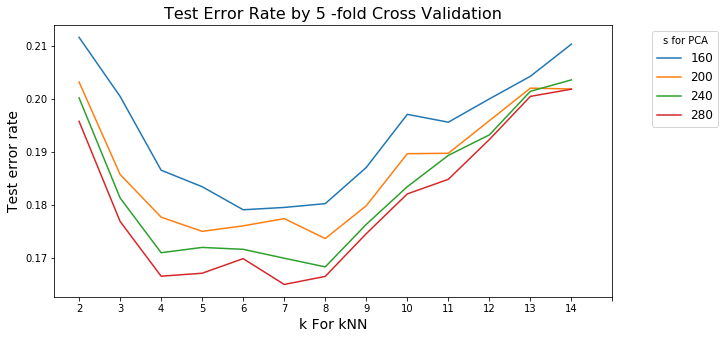

In [31]:

plt.rcParams['figure.figsize']=[10,5]
pca_testerrorate_array=np.array(pcak_testerrorrate).reshape(5,7,13)
meanerrorrate_test=np.mean(pca_testerrorate_array,axis=0)
for j in range(3,7):
    plt.plot(meanerrorrate_test[j])
    plt.legend(labels=k_pca[3:],bbox_to_anchor=(0.7,0.5,0.5,0.5),fontsize=12,title="s for PCA")
    plt.xticks(range(0,14),range(2,15))
plt.title("Test Error Rate by 5 -fold Cross Validation",fontsize=16)
plt.xlabel("k For kNN",fontsize=14)
plt.ylabel("Test error rate",fontsize=14);

###  kNN with Projections PCAhaving s=280

In [35]:
##Splitting data into train:test in the ratio 80:20
trainX=[]
testX=[]
trainY=[]
testY=[]
testXOriginalIndex=[]
testYOriginalIndex=[]

topPrincipalDirections=280
pcaproj=np.dot(X_final,VT[:topPrincipalDirections,:].T)
subject=[kk for kk in imgdict.keys()]
trainpercent=int(59*.8)

for i in range(38):
    rdict={}
    for j in range(trainpercent):
        r=random.randint(0,58)
        while rdict.get(r,-1)==r:
            r=random.randint(0,58)
        trainX.append(pcaproj[i*59+r])
        trainY.append(subject[i])
        rdict[r]=r
    for k in range(59):
            if k not in rdict:
                testX.append(pcaproj[i*59+k])
                testY.append(subject[i])
                testXOriginalIndex.append(i*59+k)
                testYOriginalIndex.append(subject[i])
trainX_pca=np.array(trainX).reshape(len(trainX),topPrincipalDirections)
# trainY_pca=np.array(trainY).reshape(len(trainY),1)
trainY_pca=np.array(trainY)
testX_pca=np.array(testX).reshape(len(testX),topPrincipalDirections)
testY_pca=np.array(testY)

##Normalizing the data
from sklearn import preprocessing
trainX_norm = preprocessing.normalize(trainX_pca)
testX_norm = preprocessing.normalize(testX_pca)


In [36]:
##Choosing K=4
k=4
knn = KNeighborsClassifier(n_neighbors=k)

# fitting the model
knn.fit(trainX_norm, trainY_pca)

##Predcting the test X:
p=knn.predict(testX_norm)

### Plotting the images at random for chosen k of kNN and s=280 prinicpal dimensions PCA

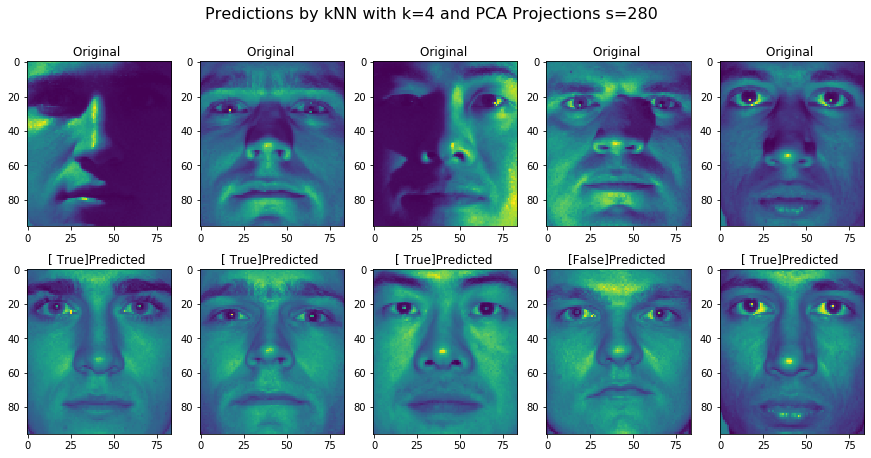

In [37]:
plt.rcParams['figure.figsize']=[15,7]

fig,ax=plt.subplots(2,5)
for jj in range(5):
    randomimg=random.randint(0,testX_norm.shape[0]-1)
    pred = knn.predict([testX_norm[randomimg]])
    #     print("Selected input {0} an predicted is {1}".format(testY_pca[randomimg],pred))
    ax[0,jj].imshow(X[testXOriginalIndex[randomimg]].reshape(96,84))
    ax[0,jj].set_title("Original ")
    ax[1,jj].imshow(imgdict[pred[0]][0].reshape(96,84))
    a=pred==testY_pca[randomimg]
    ax[1,jj].set_title(str(a)+"Predicted ")
#     print(pred==testY_pca[randomimg])
plt.suptitle("Predictions by kNN with k=4 and PCA Projections s=280",fontsize=16);

### Confusion Matrix


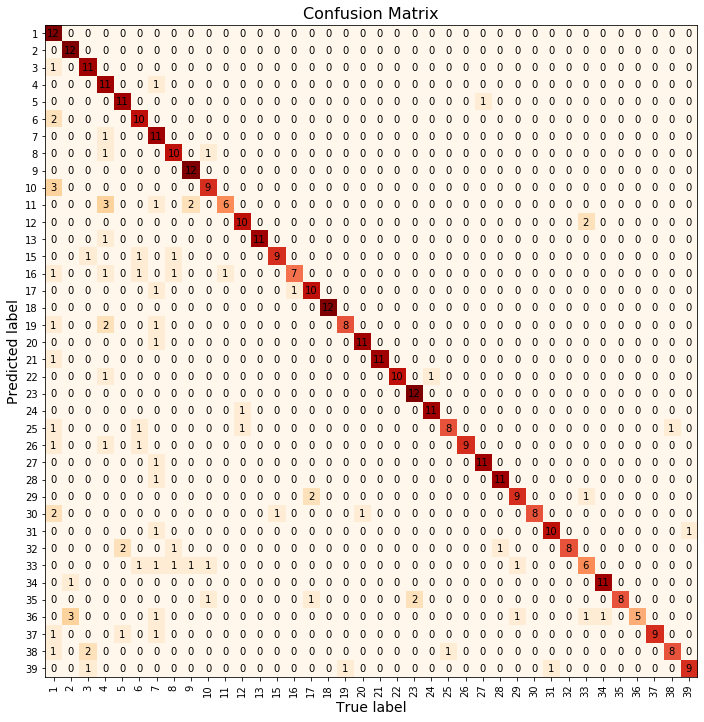

In [38]:
from sklearn.metrics import confusion_matrix
k=4
knn = KNeighborsClassifier(n_neighbors=k)
plt.rcParams['figure.figsize']=[15,12]

# fitting the model
y_score=knn.fit(trainX_norm, trainY_pca)

p=knn.predict(testX_norm)
# accuracy_score(trainY_pca,pred1)
mat = confusion_matrix(testY_pca, p ) # creates confusion matrix
# plt.rcParams['figure.figsize']=[7,7]
fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(38)) # define tick-mark positions
ax.set_yticks(np.arange(38))
ax.set_xticklabels(subject, rotation = 90) # label ticks with newsgroups
ax.set_yticklabels(subject) 
ax.set_ylim(len(subject)-0.5, -0.5) # there is a bug in matplotlib that offsets y-limits in heatmaps
ax.set_xlabel('True label',fontsize=14)     # label axes
ax.set_ylabel('Predicted label',fontsize=14)

for i in range(38): # Loop over data dimensions and create text annotations:
    for j in range(38):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k")
plt.title("Confusion Matrix",fontsize=16)
plt.savefig('conf_matrix.png');


In [39]:
Truetrue=np.diag(mat).sum()
Truefalse=np.sum(mat)-Truetrue
print("TrueTrue: {0} \nTrueFalse:{1}".format(Truetrue,Truefalse))
print("Accuracy: {}".format(accuracy_score(testY_pca, p)))

TrueTrue: 367 
TrueFalse:89
Accuracy: 0.8048245614035088


In [84]:
from sklearn.metrics import classification_report
print("Confusion Matrix \n" )
print(classification_report(testY_pca, p ))
with open('out.txt', 'w') as f:

# f = open(ff.txt,'w')
    print(classification_report(testY_pca, p ),file=f)

Confusion Matrix 

              precision    recall  f1-score   support

           1       0.44      1.00      0.62        12
           2       0.75      1.00      0.86        12
           3       0.73      0.92      0.81        12
           4       0.50      0.92      0.65        12
           5       0.79      0.92      0.85        12
           6       0.67      0.83      0.74        12
           7       0.50      0.92      0.65        12
           8       0.71      0.83      0.77        12
           9       0.80      1.00      0.89        12
          10       0.75      0.75      0.75        12
          11       0.86      0.50      0.63        12
          12       0.83      0.83      0.83        12
          13       1.00      0.92      0.96        12
          15       0.90      0.75      0.82        12
          16       0.88      0.58      0.70        12
          17       0.77      0.83      0.80        12
          18       1.00      1.00      1.00        12
        